In [10]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from prophet import Prophet

In [53]:
df = yf.download('XRP-USD', start='2016-12-08', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.217911,0.221791,0.214866,0.217488,0.217488,147916992
1,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
2,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
3,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
4,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
...,...,...,...,...,...,...,...
1873,2022-12-26,0.346383,0.369103,0.345969,0.365723,0.365723,797909103
1874,2022-12-27,0.365728,0.372270,0.359441,0.368126,0.368126,905248563
1875,2022-12-28,0.368122,0.368543,0.356136,0.356531,0.356531,839617676
1876,2022-12-29,0.356524,0.357225,0.338911,0.342846,0.342846,898022518


In [54]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,0.346020
1869,2022-12-22,0.349600
1870,2022-12-23,0.354273
1871,2022-12-24,0.352179
1872,2022-12-25,0.346392
1873,2022-12-26,0.365723
1874,2022-12-27,0.368126
1875,2022-12-28,0.356531
1876,2022-12-29,0.342846
1877,2022-12-30,0.345017


In [55]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/mmocdvsl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjb5rn7zm/hm3dkv30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66490', 'data', 'file=/tmp/tmpjb5rn7zm/mmocdvsl.json', 'init=/tmp/tmpjb5rn7zm/hm3dkv30.json', 'output', 'file=/tmp/tmpjb5rn7zm/prophet_model8bdglo2c/prophet_model-20230105085257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
df = df[:-1]
df

,ds,y
0,2017-11-09,0.217488
1,2017-11-10,0.206483
2,2017-11-11,0.210430
3,2017-11-12,0.197339
4,2017-11-13,0.203442
...,...,...
1872,2022-12-25,0.346392
1873,2022-12-26,0.365723
1874,2022-12-27,0.368126
1875,2022-12-28,0.356531


In [57]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-09,0.686030,0.432774,0.970128,0.686030,0.686030,0.020419,0.020419,0.020419,-0.001591,-0.001591,-0.001591,0.022010,0.022010,0.022010,0.0,0.0,0.0,0.706449
1,2017-11-10,0.691963,0.435863,0.963477,0.691963,0.691963,0.018991,0.018991,0.018991,0.000300,0.000300,0.000300,0.018691,0.018691,0.018691,0.0,0.0,0.0,0.710954
2,2017-11-11,0.697895,0.470415,0.979610,0.697895,0.697895,0.019644,0.019644,0.019644,0.004037,0.004037,0.004037,0.015607,0.015607,0.015607,0.0,0.0,0.0,0.717539
3,2017-11-12,0.703828,0.460593,1.005280,0.703828,0.703828,0.014898,0.014898,0.014898,0.002154,0.002154,0.002154,0.012745,0.012745,0.012745,0.0,0.0,0.0,0.718726
4,2017-11-13,0.709761,0.432215,0.975371,0.709761,0.709761,0.010158,0.010158,0.010158,0.000076,0.000076,0.000076,0.010082,0.010082,0.010082,0.0,0.0,0.0,0.719919


In [58]:
from prophet import Prophet
from matplotlib import pyplot as pd

In [59]:
future.tail()

,ds
2238,2023-12-26
2239,2023-12-27
2240,2023-12-28
2241,2023-12-29
2242,2023-12-30


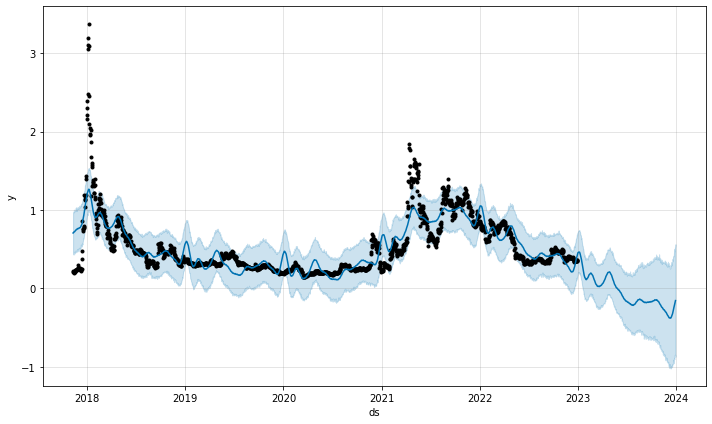

In [60]:
plot1 = m.plot(forecast)